In [14]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

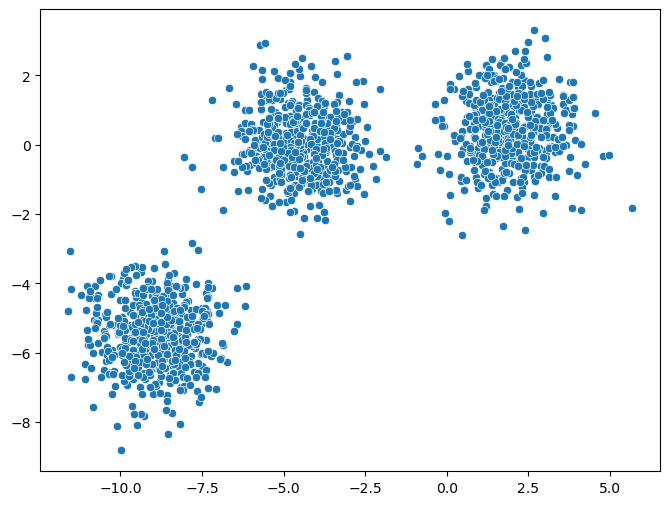

In [15]:
n_samples = 1500
random_state = 170
X, _ = make_blobs(n_samples=n_samples, random_state=random_state)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1])

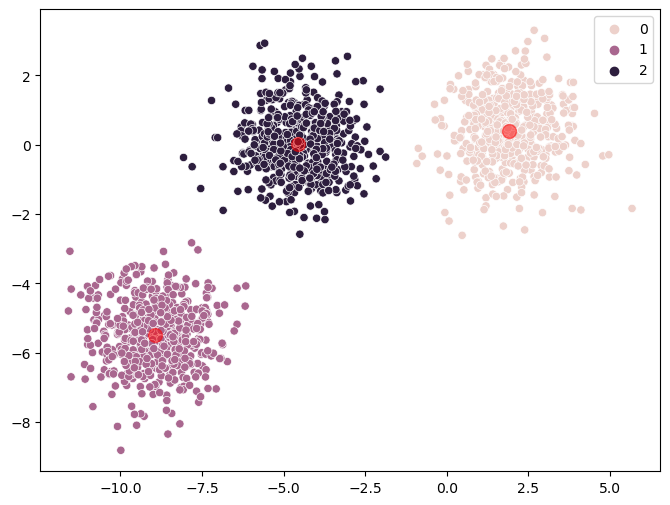

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=random_state)
y_pred = kmeans.fit_predict(X)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=100, alpha=0.5)

<AxesSubplot:>

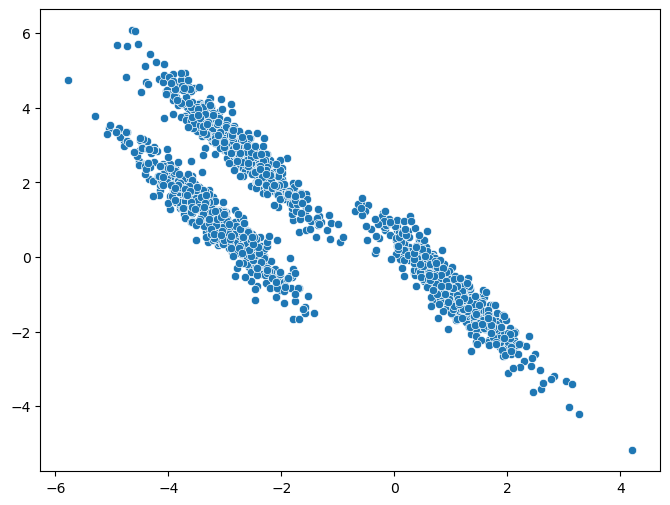

In [17]:
import numpy as np

transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_aniso[:, 0], y= X_aniso[:, 1])


In [18]:
X_aniso.std(axis=0)

array([2.02019173, 1.86325317])

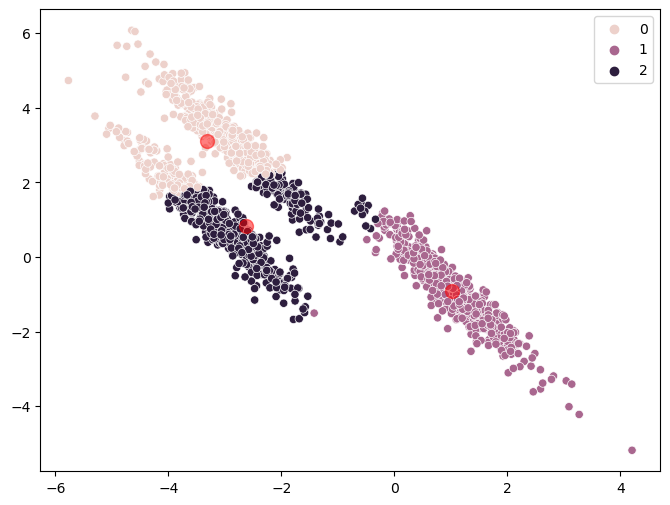

In [19]:
plt.figure(figsize=(8, 6))
kmeans= KMeans(n_clusters=3, random_state=random_state)
y_pred = kmeans.fit_predict(X_aniso)
sns.scatterplot(x=X_aniso[:, 0], y=X_aniso[:, 1], hue=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red',s=100, alpha=0.5)

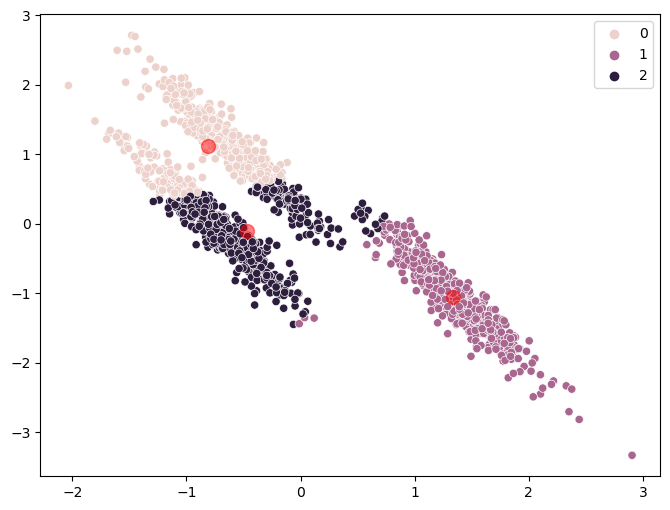

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_aniso_scaled = scaler.fit_transform(X_aniso)
plt.figure(figsize=(8, 6))
kmeans= KMeans(n_clusters=3, random_state=random_state)
y_pred = kmeans.fit_predict(X_aniso_scaled)
sns.scatterplot(x=X_aniso_scaled[:, 0], y=X_aniso_scaled[:, 1], hue=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red',s=100, alpha=0.5)


In [21]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, covariance_type='full', max_iter=20, random_state=0)
y_pred = gmm.fit_predict(X_aniso)

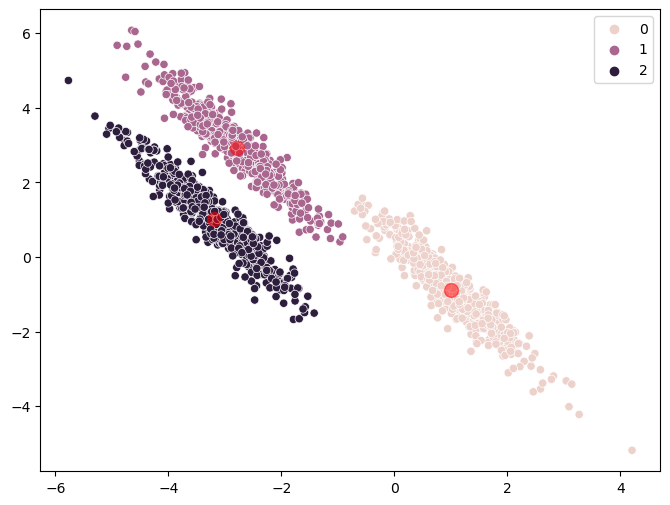

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_aniso[:, 0], y=X_aniso[:, 1], hue=y_pred)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', s=100, alpha=0.5)

<AxesSubplot:>

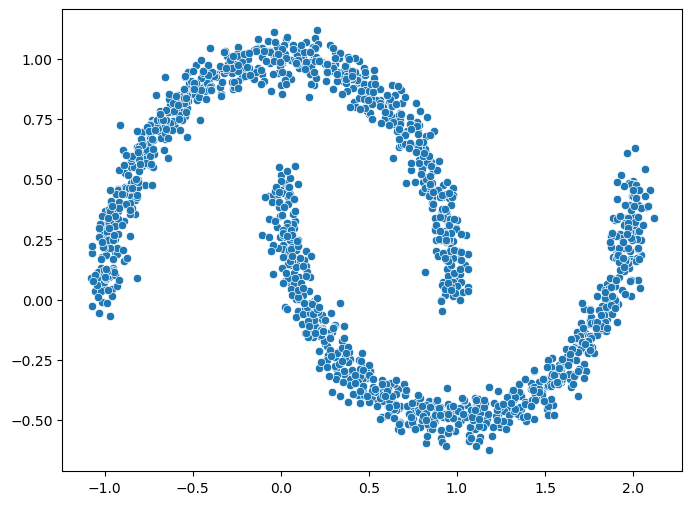

In [23]:
from sklearn.datasets import make_moons


X_moons, _ = make_moons(n_samples=1500, noise=.05)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_moons[:, 0], y=X_moons[:, 1])

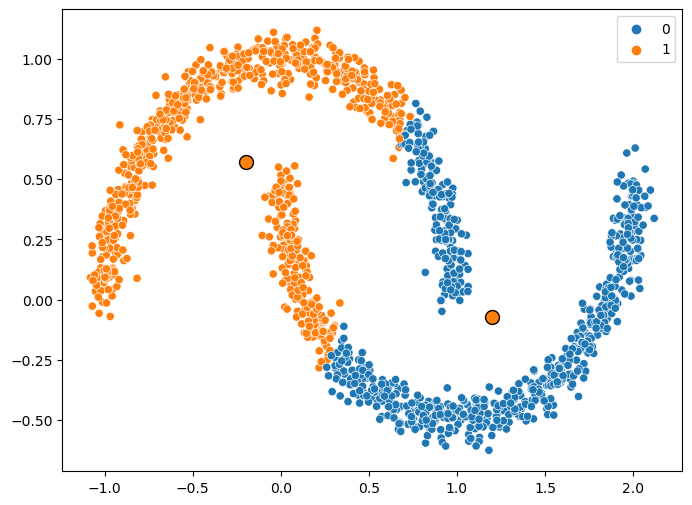

In [28]:
plt.figure(figsize=(8, 6))
kmeans = KMeans(n_clusters=2, random_state=1234)
y_predict = kmeans.fit_predict(X_moons)
sns.scatterplot(x=X_moons[:, 0], y=X_moons[:, 1], hue=y_predict)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, edgecolors='black')

In [29]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, covariance_type='full', max_iter=20, random_state=0)
y_pred = gmm.fit_predict(X_moons)

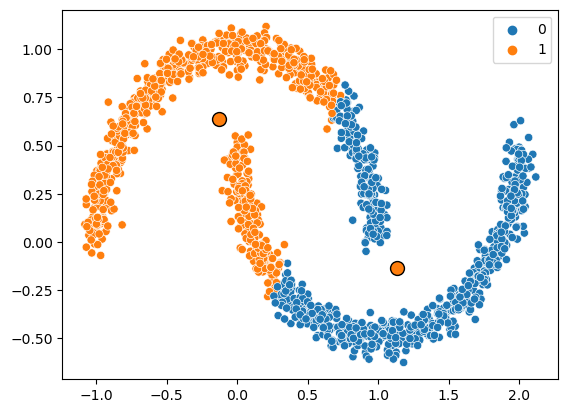

In [30]:
sns.scatterplot(x=X_moons[:, 0], y=X_moons[:, 1], hue=y_predict)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], s=100, edgecolors='black')

In [31]:
from sklearn.cluster import SpectralClustering

scm = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=10, n_init=10, assign_labels='kmeans', random_state=0)
y_pred = scm.fit_predict(X_moons)

/home/thomas/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


<AxesSubplot:>

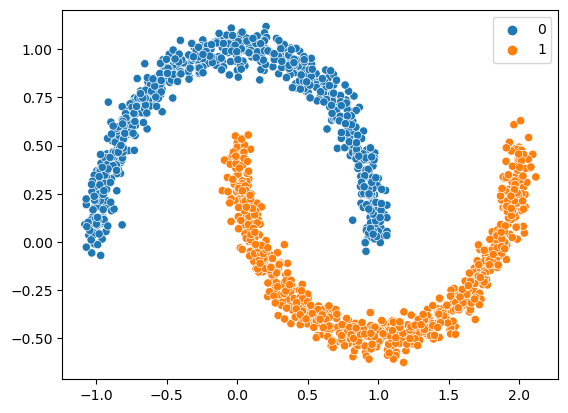

In [33]:
sns.scatterplot(x=X_moons[:, 0], y=X_moons[:, 1], hue=y_pred)